In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data =pd.read_csv(r"D:\Excel R\Excel R Project\Beds_Occupied.csv")

In [3]:
data.head()# Its is a Univariate Analysis, Because it is having Single Variable

,collection_date,Total Inpatient Beds
0,15-06-2020,293
1,16-06-2020,295
2,17-06-2020,290
3,18-06-2020,291
4,19-06-2020,288


In [4]:
data.shape

(359, 2)

# Data Pre-Processing

4 Bussines moments

In [5]:
data.mean()# average value of data

Total Inpatient Beds    241.983287
dtype: float64

In [6]:
data.var()# average of squared distances form each data point

Total Inpatient Beds    837.340502
dtype: float64

In [7]:
data.skew()# Postive skewness 

Total Inpatient Beds    0.480804
dtype: float64

In [8]:
data.kurt() # negitive Kurtosis

Total Inpatient Beds   -0.60372
dtype: float64

In [9]:
data.describe() # max value is 349, and min value is 190

,Total Inpatient Beds
count,359.000000
mean,241.983287
std,28.936836
min,190.000000
25%,219.000000
50%,235.000000
75%,259.000000
max,341.000000


In [10]:
data.dtypes


collection_date         object
Total Inpatient Beds     int64
dtype: object

In [11]:
data.columns

Index(['collection_date', 'Total Inpatient Beds'], dtype='object')

In [12]:
len(data['Total Inpatient Beds'].unique())# length of the unique values out of 359 
# that is the remaning 275 values are repeated .

84

In [13]:
data.info() # No nan values in the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   collection_date       359 non-null    object
 1   Total Inpatient Beds  359 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.7+ KB


In [14]:
data.isnull().sum()  # no missing values

collection_date         0
Total Inpatient Beds    0
dtype: int64

In [15]:
len(data['Total Inpatient Beds'].values)

359

In [16]:
data.collection_date = pd.to_datetime(data.collection_date,format ="%d-%m-%Y")

In [17]:
data.set_index('collection_date',inplace =True)

In [18]:
data.index[0:5]

DatetimeIndex(['2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18',
               '2020-06-19'],
              dtype='datetime64[ns]', name='collection_date', freq=None)

In [19]:
data.dtypes

Total Inpatient Beds    int64
dtype: object

In [20]:
data.head

<bound method NDFrame.head of                  Total Inpatient Beds
collection_date                      
2020-06-15                        293
2020-06-16                        295
2020-06-17                        290
2020-06-18                        291
2020-06-19                        288
...                               ...
2021-06-11                        312
2021-06-12                        212
2021-06-13                        299
2021-06-14                        202
2021-06-15                        220

[359 rows x 1 columns]>

In [21]:
dt = pd.date_range("06-15-2020","06-15-2021")
idx = pd.DatetimeIndex(dt)
df= data.reindex(idx)

In [22]:
pd.set_option('display.max_rows', df.shape[0]+1) # Here we have NaN values we need to impute these values
print(df)

            Total Inpatient Beds
2020-06-15                 293.0
2020-06-16                 295.0
2020-06-17                 290.0
2020-06-18                 291.0
2020-06-19                 288.0
2020-06-20                 289.0
2020-06-21                 277.0
2020-06-22                 289.0
2020-06-23                 292.0
2020-06-24                 293.0
2020-06-25                 291.0
2020-06-26                 282.0
2020-06-27                 283.0
2020-06-28                 284.0
2020-06-29                 194.0
2020-06-30                 292.0
2020-07-01                 275.0
2020-07-02                 290.0
2020-07-03                 287.0
2020-07-04                 283.0
2020-07-05                 282.0
2020-07-06                 284.0
2020-07-07                 291.0
2020-07-08                 292.0
2020-07-09                 294.0
2020-07-10                 287.0
2020-07-11                 284.0
2020-07-12                 282.0
2020-07-13                 292.0
2020-07-14

In [23]:
#Missing Data ==> NaN Values 
print("NaN values in the  Total Inpatient Beds ",df.isna().sum())
print("The length of the data",len(df))
print("Total  Unique dates as index column",df.index.nunique())

NaN values in the  Total Inpatient Beds  Total Inpatient Beds    7
dtype: int64
The length of the data 366
Total  Unique dates as index column 366


In [25]:
df3 =df.interpolate(method='time')
df3

,Total Inpatient Beds
2020-06-15,293.0
2020-06-16,295.0
2020-06-17,290.0
2020-06-18,291.0
2020-06-19,288.0
2020-06-20,289.0
2020-06-21,277.0
2020-06-22,289.0
2020-06-23,292.0
2020-06-24,293.0


In [26]:
# Check Again for NaN values
#Missing Data ==> NaN Values 
print("NaN values in the  Total Inpatient Beds ",df3.isna().sum())
print("The length of the data",len(df3))
print("Total  Unique dates as index column",df3.index.nunique())

NaN values in the  Total Inpatient Beds  Total Inpatient Beds    0
dtype: int64
The length of the data 366
Total  Unique dates as index column 366


In [27]:
df3.mean()

Total Inpatient Beds    241.469945
dtype: float64

In [28]:
df3.var()

Total Inpatient Beds    835.666765
dtype: float64

In [29]:
df3.median()

Total Inpatient Beds    234.0
dtype: float64

In [30]:
# Data Visualization 

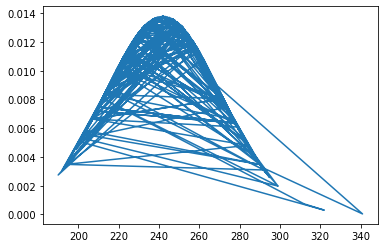

In [31]:
#Normal Distribution
from scipy.stats import norm
import statistics
mean =statistics.mean(data['Total Inpatient Beds'])
std =statistics.stdev(data['Total Inpatient Beds'])

#plt.figsize =(14,10)
plt.plot(data['Total Inpatient Beds'], norm.pdf(data['Total Inpatient Beds'], mean, std))
plt.show()
# from this normal distributin we can clearly say that they are two Outliers in the Data  320, and 340
# this is  one of the reason that we are getting for higher variane value =  837.340502 because of the data is spread from 190 to 340
# 320 & 340 (because these two data points in the data is been widely spreaded)

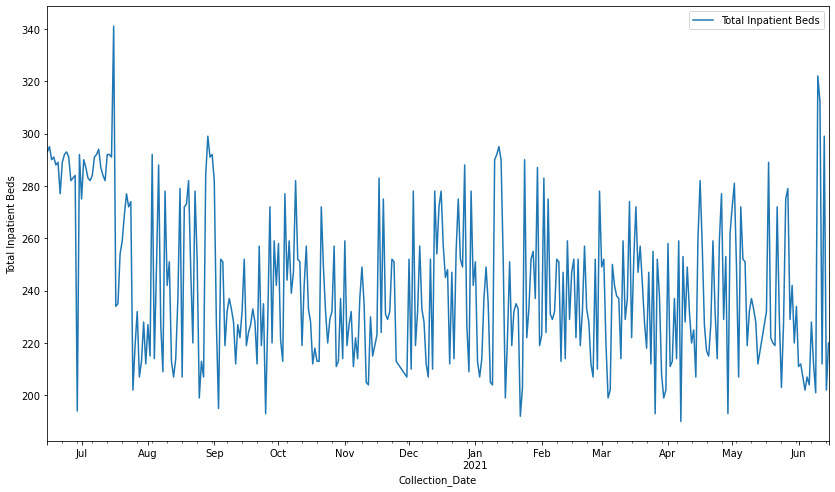

In [32]:
#line PLot of Time Series
rk = df3.plot.line(figsize=(14,8))
rk.set_xlabel('Collection_Date')
rk.set_ylabel('Total Inpatient Beds');
# From the plot we can see that the data is stationary.
#the X- axis contains the Time Series variable (collection date)
# the Y-axis contains the Random variable (Total In patient Beds) value ranges from 150-350
# the 

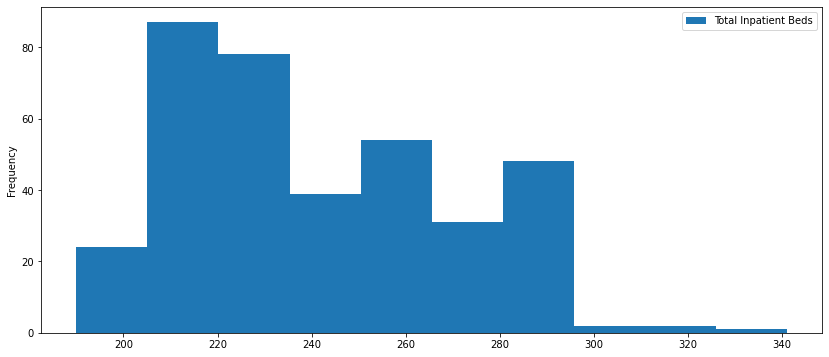

In [33]:
#Histogram Plot
rk1 =df3.plot(kind="hist",figsize =(14,6),fontsize =10)
plt.show()

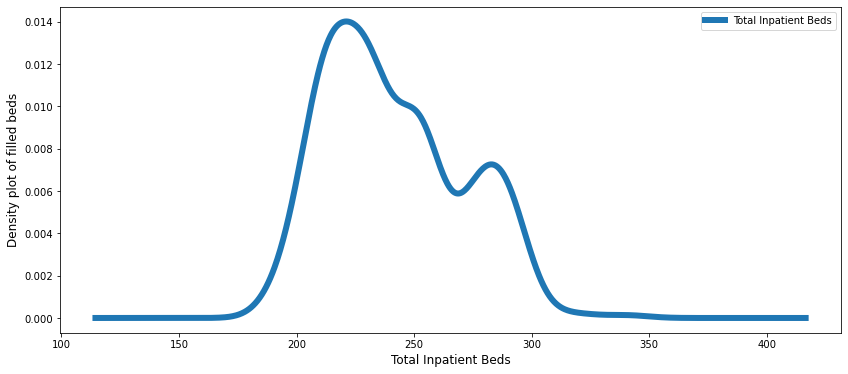

In [34]:
rk2 =df3.plot(kind="density",figsize =(14,6),fontsize =10,linewidth=6)
rk2.set_xlabel("Total Inpatient Beds",fontsize =12)
rk2.set_ylabel("Density plot of filled beds",fontsize =12)
plt.show()

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Total Inpatient Beds'>

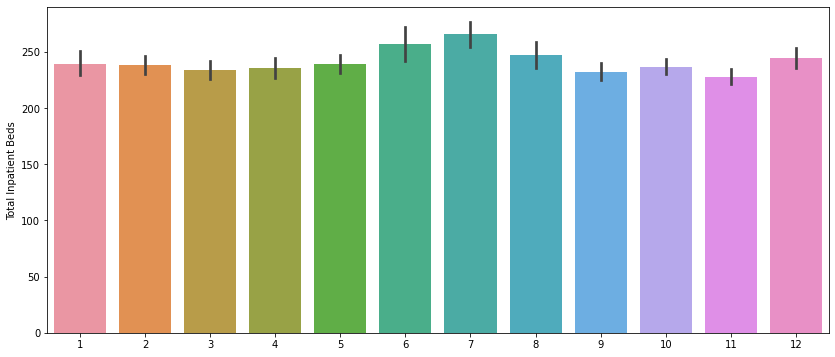

In [35]:
fig, rk4 = plt.subplots(figsize=(14,6))
sns.barplot(df3.index.month,
            df3['Total Inpatient Beds'], 
            ax =rk4,
            linewidth =4)


C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Total Inpatient Beds'>

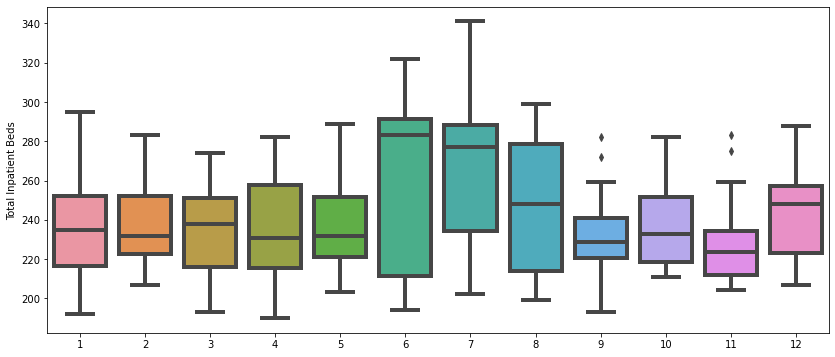

In [36]:
fig, rk3 = plt.subplots(figsize=(14,6))
sns.boxplot(df3.index.month,
            df3['Total Inpatient Beds'], 
            ax =rk3,
            linewidth =4)

In [37]:
X=df3['Total Inpatient Beds'].values
split   =  round(len(X)/2)
X1, X2 =X[0:split],X[split:]
mean1 =X1.mean()
mean2 =X2.mean()
var1 =X1.var()
var2 =X2.var()
print("The Mean  and Variance of 1st half is ",mean1,var1)
print("The Mean  and Variance of 1st half is ",mean2,var2)

The Mean  and Variance of 1st half is  245.30054644808743 936.6430051658754
The Mean  and Variance of 1st half is  237.63934426229508 700.7770312639971


In [38]:
#Smoothing techniques
from statsmodels.tsa.stattools import adfuller
x=df3['Total Inpatient Beds'].values
result= adfuller(x)
#print(result)
print('ADF Statistic: %.3f' % result[0])
print('p-value: %.3f' % result[1])
print("Lags- Used: %.3f" % result[2])
print('Critical Values:')
for key,value in result[4].items():
    print('\t%s: %.3f' % (key, value))
#The Intuation of Dicky Fuller Test 
#Here the Critical value is Less than 10% , thus the Time Series is Stationary with the 90% confidence

ADF Statistic: -5.806
p-value: 0.000
Lags- Used: 4.000
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


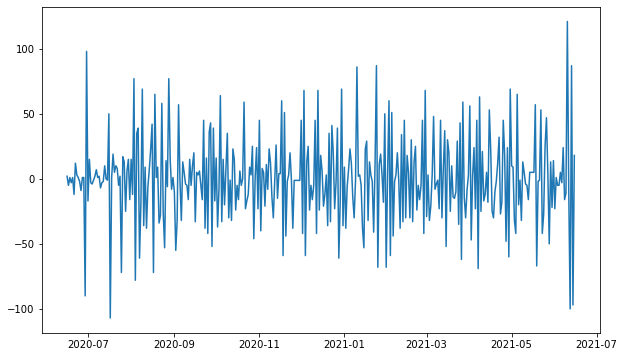

In [39]:
#diffrencing
ts_diff =df3 -df3.shift()
plt.figure(figsize =(10,6))
plt.plot(ts_diff)

<ipython-input-40-69e56a8158a0>:25: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


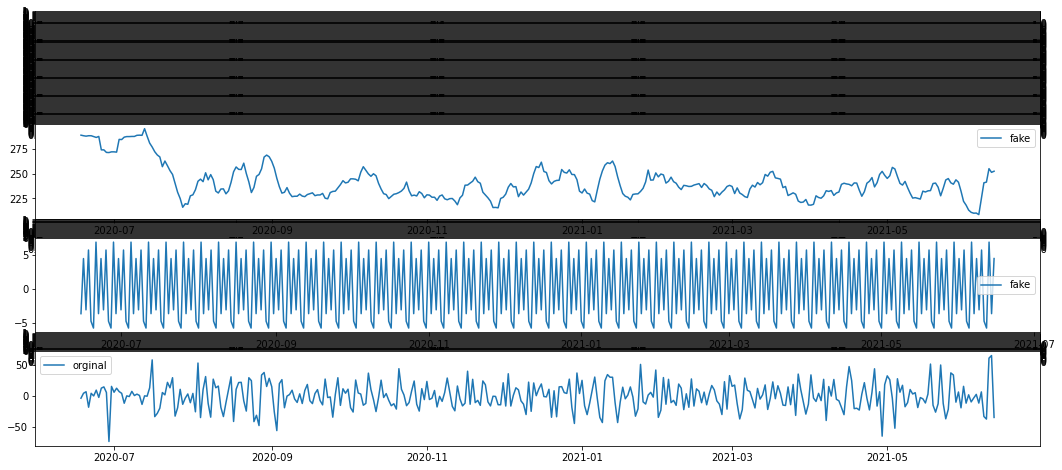

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df3)
trend =decomposition.trend
seasonal =decomposition.seasonal
residual = decomposition.resid
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
plt.subplots(411)
plt.plot(df3,label ='orginal')
plt.legend(loc ='best')

################
plt.subplot(412)
plt.plot(trend,label ='fake')
plt.legend(loc='best')
##################
plt.subplot(413)
plt.plot(seasonal,label ='fake')
plt.legend(loc='best')
#############
plt.subplot(414)
plt.plot(residual,label ='orginal')
plt.legend(loc='best')

plt.tight_layout()


In [41]:
#The Simple Trend Reduction techniques


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

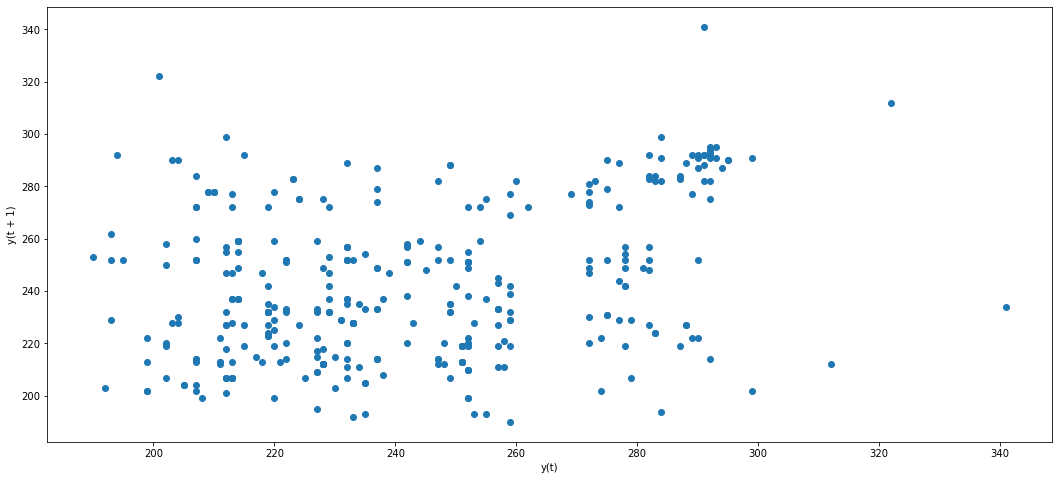

In [42]:
# Lag Plot
from pandas.plotting import lag_plot
lag_plot(data['Total Inpatient Beds'])

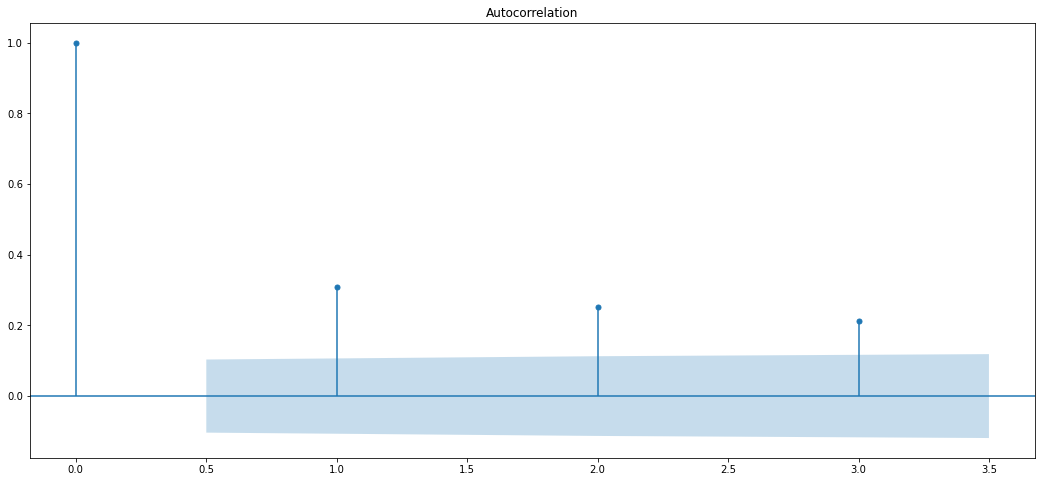

In [43]:
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(data['Total Inpatient Beds'],lags=3)
plt.show()